<a href="https://colab.research.google.com/github/syedokun/HAD7001/blob/main/Datathon_4/Datathon_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports and Environment setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files

source_df = pd.read_csv('/content/Datathon #4 - mhealth Dataset - HAD7001.csv')

## EDA

In [ ]:
source_df.columns

Index(['alx', 'aly', 'alz', 'glx', 'gly', 'glz', 'arx', 'ary', 'arz', 'grx',
       'gry', 'grz', 'Activity', 'subject'],
      dtype='object')

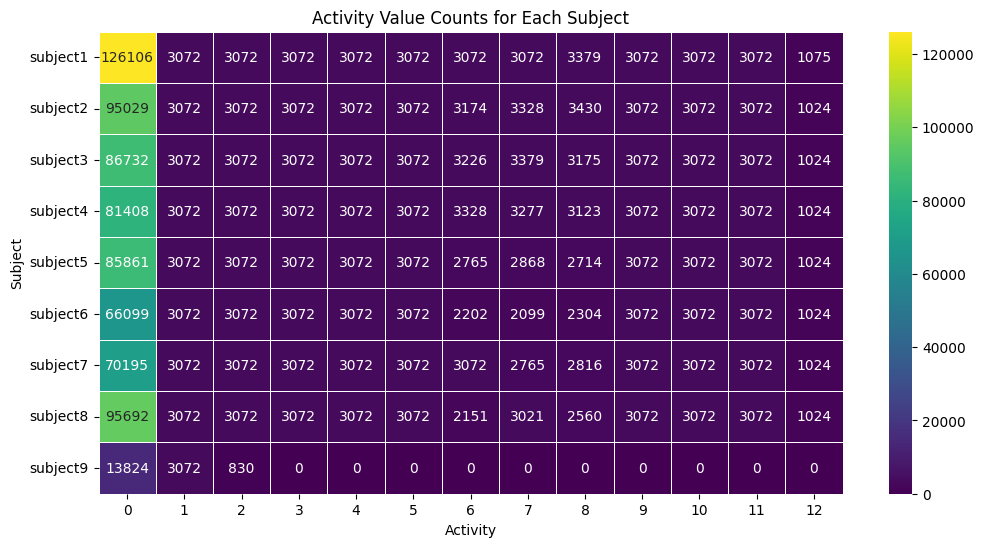

In [ ]:
# Draw matrix showing Activity value counts for each subject

import matplotlib.pyplot as plt
subject_activity_counts = source_df.groupby('subject')['Activity'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(subject_activity_counts, annot=True, fmt="d", cmap="viridis", linewidths=.5)
plt.title('Activity Value Counts for Each Subject')
plt.xlabel('Activity')
plt.ylabel('Subject')
plt.show()

In [ ]:
# Drop subject9 from source_df
source_df = source_df[source_df["subject"] != 'subject9']

In [ ]:
# Drop Activity 0
source_df = source_df[source_df["Activity"] != 0]

In [ ]:
# Create a new column in source_df called movement and assign values in movement based on the following values of "Activity":
# 1, 2, 3 = "Sedentary"
# 4, 5, 6, 7, 8 = "Light"
# 9, 10, 11, 12 = "Cardio"

def categorize_activity(activity):
    if activity in [1, 2, 3]:
        return 0
    elif activity in [4, 5, 6, 7, 8]:
        return 1
    elif activity in [9, 10, 11, 12]:
        return 2
    else:
        return -1

source_df['movement'] = source_df['Activity'].apply(categorize_activity)

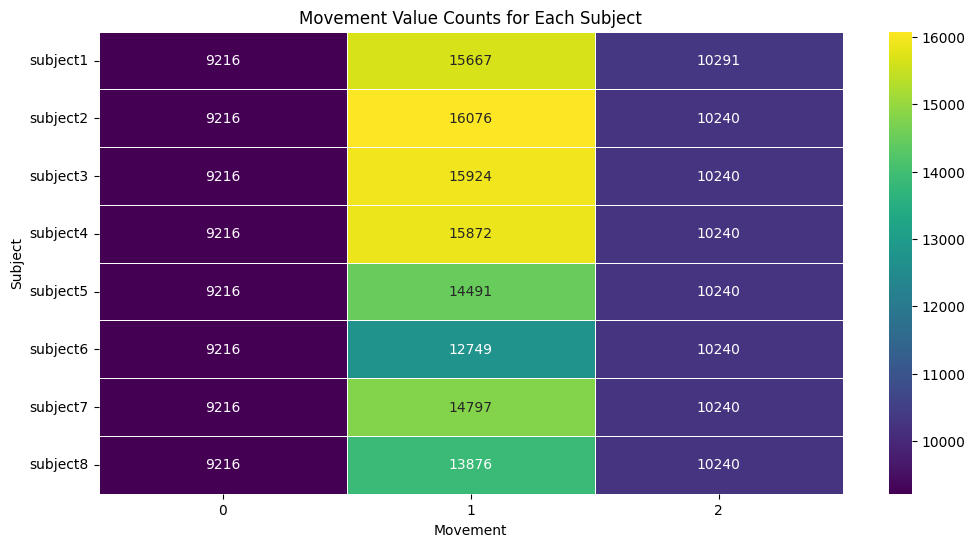

In [ ]:
# Draw matrix showing movement value counts for each subject

import matplotlib.pyplot as plt
subject_activity_counts = source_df.groupby('subject')['movement'].value_counts().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(subject_activity_counts, annot=True, fmt="d", cmap="viridis", linewidths=.5)
plt.title('Movement Value Counts for Each Subject')
plt.xlabel('Movement')
plt.ylabel('Subject')
plt.show()

In [ ]:
source_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject,movement
6656,2.6493,-9.4517,0.37683,-0.20965,-0.88931,-0.50884,-2.8439,-9.0618,1.8177,-0.058824,-0.93429,-0.34483,1,subject1,0
6657,2.4157,-9.5306,0.40179,-0.20965,-0.88931,-0.50884,-2.9935,-9.2048,1.5189,-0.058824,-0.93429,-0.34483,1,subject1,0
6658,2.3865,-9.5991,0.48141,-0.20037,-0.86867,-0.50688,-2.8846,-9.1945,1.5507,-0.058824,-0.93429,-0.34483,1,subject1,0
6659,2.3758,-9.5997,0.42919,-0.20037,-0.86867,-0.50688,-2.9245,-9.1746,1.5413,-0.078431,-0.93429,-0.34052,1,subject1,0
6660,2.3239,-9.5406,0.40038,-0.20037,-0.86867,-0.50688,-2.8963,-9.2039,1.6127,-0.078431,-0.93429,-0.34052,1,subject1,0


In [ ]:
source_df.shape

(275151, 15)

In [ ]:
source_df.isnull().sum()

,0
alx,0
aly,0
alz,0
glx,0
gly,0
glz,0
arx,0
ary,0
arz,0
grx,0


## Fitting the model

In [ ]:
from sklearn.model_selection import train_test_split

# Grouping by 'subject' and creating a list of dataframes, one per group
grouped = source_df.groupby('subject')
grouped_dfs = [group for _, group in grouped]

# Splitting the groups into training and test sets with an 80:20 ratio
train_groups, test_groups = train_test_split(grouped_dfs, test_size=0.2, random_state=42)

# Reassembling the training and test datasets from the groups
train_df = pd.concat(train_groups)
test_df = pd.concat(test_groups)

train_df_shape = train_df.shape
test_df_shape = test_df.shape

train_df_shape, test_df_shape

((207414, 15), (67737, 15))

In [ ]:
train_df["movement"].value_counts()

,count
movement,
1,90627
2,61491
0,55296


In [ ]:
test_df["subject"].value_counts()

,count
subject,
subject2,35532
subject6,32205


In [ ]:
from sklearn.preprocessing import StandardScaler

# Identifying numerical columns (excluding 'Activity' and 'movement')
numerical_columns = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_columns.remove('Activity')
numerical_columns.remove('movement')

scaler = StandardScaler()

train_df[numerical_columns] = scaler.fit_transform(train_df[numerical_columns])
test_df[numerical_columns] = scaler.transform(test_df[numerical_columns])

train_df.head()

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject,movement
6656,0.243975,-0.069035,0.170485,-0.630257,-0.840154,-0.788474,0.041904,-0.485958,-0.126266,0.211671,-1.004809,-1.529028,1,subject1,0
6657,0.188259,-0.084214,0.174366,-0.630257,-0.840154,-0.788474,0.016937,-0.507858,-0.199173,0.211671,-1.004809,-1.529028,1,subject1,0
6658,0.181294,-0.097393,0.186745,-0.611071,-0.792613,-0.784992,0.035111,-0.506281,-0.191413,0.211671,-1.004809,-1.529028,1,subject1,0
6659,0.178742,-0.097509,0.178626,-0.611071,-0.792613,-0.784992,0.028452,-0.503233,-0.193707,0.177052,-1.004809,-1.520266,1,subject1,0
6660,0.166364,-0.086138,0.174147,-0.611071,-0.792613,-0.784992,0.033159,-0.507720,-0.176285,0.177052,-1.004809,-1.520266,1,subject1,0


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Group by 'subject' & 'Activity' and create sequences
grouped = train_df.groupby(['subject', 'Activity'], sort=False)
sequences = [group.drop(columns=['subject', 'Activity', 'movement']).values for _, group in grouped]
targets = [group['movement'].iloc[-1] for _, group in grouped]

# Padding sequences
max_length = max(len(s) for s in sequences)
# We can also go with max_length
padded_sequences = pad_sequences(sequences, maxlen=100, padding='post', dtype='float')

padded_sequences.shape

(72, 100, 12)

In [ ]:
# Testing sequences

# Group by 'subject' & 'Activity' and create sequences
grouped_test = test_df.groupby(['subject', 'Activity'], sort=False)
sequences_test = [group.drop(columns=['subject', 'Activity', 'movement']).values for _, group in grouped_test]
targets_test = [group['movement'].iloc[-1] for _, group in grouped_test]  # Assuming all records for a patient have the same target

# Padding sequences for the test set
padded_sequences_test = pad_sequences(sequences_test, maxlen=100, padding='post', dtype='float')

padded_sequences_test.shape

(24, 100, 12)

### RNN

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = padded_sequences.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 3  # For three-class classification
epochs = 30
learning_rate = 0.0001
batch_size = 512
landa = 0.000001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(padded_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(padded_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.RNN(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size // 2)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size  // 2, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()

# Lists to store accuracies and losses
all_loss = []
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):

    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    optimizer = Adam(list(rnn_layer1.parameters())+ list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        loss = loss_fn(out, Y)
        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # max_iter -=1
        # if max_iter == 0:
        #     break
    all_loss += per_epoch_loss_list

    # Evaluation on training and validation data
    rnn_layer1.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/30 ---> Train Accuracy: 45.833333333333336%, Validation Accuracy: 58.333333333333336%
Epoch 1/30 ---> Train Accuracy: 48.611111111111114%, Validation Accuracy: 58.333333333333336%
Epoch 2/30 ---> Train Accuracy: 50.0%, Validation Accuracy: 58.333333333333336%
Epoch 3/30 ---> Train Accuracy: 50.0%, Validation Accuracy: 58.333333333333336%
Epoch 4/30 ---> Train Accuracy: 50.0%, Validation Accuracy: 58.333333333333336%
Epoch 5/30 ---> Train Accuracy: 52.77777777777778%, Validation Accuracy: 54.166666666666664%
Epoch 6/30 ---> Train Accuracy: 52.77777777777778%, Validation Accuracy: 54.166666666666664%
Epoch 7/30 ---> Train Accuracy: 56.94444444444444%, Validation Accuracy: 50.0%
Epoch 8/30 ---> Train Accuracy: 58.333333333333336%, Validation Accuracy: 54.166666666666664%
Epoch 9/30 ---> Train Accuracy: 59.72222222222222%, Validation Accuracy: 58.333333333333336%
Epoch 10/30 ---> Train Accuracy: 59.72222222222222%, Validation Accuracy: 58.333333333333336%
Epoch 11/30 ---> Train Acc

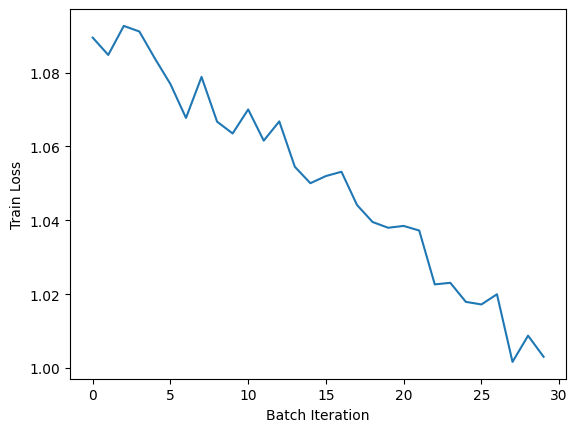

In [ ]:
import matplotlib.pyplot as plt
plt.plot([i for i in range(len(all_loss))], all_loss, label="Train")
plt.xlabel('Batch Iteration')
plt.ylabel('Train Loss')
plt.show()

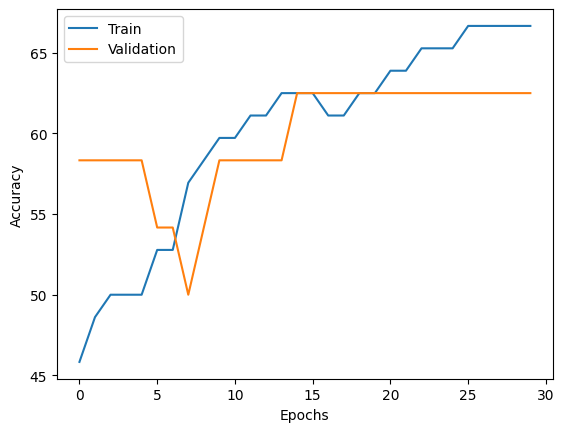

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Calculate accuracy, recall, precision and F1 on the test set

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

all_preds = []
with t.no_grad():
    for X, Y in test_data_loader:
        out, _ = rnn_layer1(X)
        # out, _ = rnn_layer2(out)
        out = out[:, -1, :]
        out = relu(fc_layer1(out))
        out = fc_layer2(out)
        _, predicted = t.max(out.data, 1)
        all_preds.extend(predicted.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(targets_test, all_preds)
recall = recall_score(targets_test, all_preds, average='weighted')  # Use 'weighted' for multiclass
precision = precision_score(targets_test, all_preds, average='weighted') # Use 'weighted' for multiclass
f1 = f1_score(targets_test, all_preds, average='weighted') # Use 'weighted' for multiclass

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

Accuracy: 0.625
Recall: 0.625
Precision: 0.6617647058823529
F1 Score: 0.5864197530864197


In [ ]:
len(all_preds)

24

### LSTM

In [ ]:
import torch as t
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader

# Hyperparameters
input_size = padded_sequences.shape[2]
hidden_size = 256  # Number of hidden units in RNN
num_classes = 3  # For three-class classification
epochs = 12
learning_rate = 0.001
batch_size = 512
landa = 0.001  # Regularization term (lambda)

# Data preparation
train_dataset = TensorDataset(t.tensor(padded_sequences, dtype=t.float32), t.tensor(targets, dtype=t.long))
train_data_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(t.tensor(padded_sequences_test, dtype=t.float32), t.tensor(targets_test, dtype=t.long))
test_data_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# RNN layers and additional fully connected layer
rnn_layer1 = nn.LSTM(input_size, hidden_size, batch_first=True)
dropout1 = nn.Dropout(0.5)  # Add dropout between RNN layers
fc_layer1 = nn.Linear(hidden_size, hidden_size)  # Additional fully connected layer
fc_layer2 = nn.Linear(hidden_size, num_classes)  # Final output layer

# Dropout layer
dropout_fc = nn.Dropout(0.2)  # Add dropout between fully connected layers

# Activation function
relu = nn.ReLU()

# Loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = Adam(list(rnn_layer1.parameters()) + list(fc_layer1.parameters()) + list(fc_layer2.parameters()), lr=learning_rate)

# Lists to store accuracies and losses
train_accuracy_list = []
validation_accuracy_list = []
train_loss_list = []

# Training loop
for epoch in range(epochs):
    if epoch % 10 == 0:
        learning_rate *= 0.9  # Learning rate scheduling

    per_epoch_loss_list = []
    for X, Y in train_data_loader:
        # Forward pass through layers
        out, _ = rnn_layer1(X)
        out = dropout1(out)  # Apply dropout between RNN layers
        out = out[:, -1, :]  # Get the last output of the sequence
        out = relu(fc_layer1(out))  # Apply activation function after first fully connected layer
        out = dropout_fc(out)  # Apply dropout between fully connected layers
        out = fc_layer2(out)

        # Regularization
        loss = loss_fn(out, Y)

        per_epoch_loss_list.append(loss.item())

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Evaluation on training and validation data
    rnn_layer1.eval()
    # rnn_layer2.eval()
    fc_layer1.eval()
    fc_layer2.eval()

    with t.no_grad():
        # Training data
        train_correct, train_total = 0, 0
        for X, Y in train_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            train_total += Y.size(0)
            train_correct += (predicted == Y).sum().item()
        train_accuracy = 100 * train_correct / train_total

        # Validation data
        validation_correct, validation_total = 0, 0
        for X, Y in test_data_loader:
            out, _ = rnn_layer1(X)
            out = dropout1(out)  # Apply dropout between RNN layers
            out = out[:, -1, :]
            out = relu(fc_layer1(out))
            out = dropout_fc(out)  # Apply dropout between fully connected layers
            out = fc_layer2(out)
            _, predicted = t.max(out.data, 1)
            validation_total += Y.size(0)
            validation_correct += (predicted == Y).sum().item()
        validation_accuracy = 100 * validation_correct / validation_total

        # Print accuracy for the current epoch
        print(f'Epoch {epoch}/{epochs} ---> Train Accuracy: {train_accuracy}%, Validation Accuracy: {validation_accuracy}%')

        # Append accuracy values to lists
        train_accuracy_list.append(train_accuracy)
        validation_accuracy_list.append(validation_accuracy)

    # Calculate and append the average loss for the epoch
    train_loss_list.append(sum(per_epoch_loss_list) / len(per_epoch_loss_list))

    # Set the model back to train mode
    rnn_layer1.train()
    # rnn_layer2.train()
    fc_layer1.train()
    fc_layer2.train()


Epoch 0/12 ---> Train Accuracy: 48.611111111111114%, Validation Accuracy: 58.333333333333336%
Epoch 1/12 ---> Train Accuracy: 59.72222222222222%, Validation Accuracy: 50.0%
Epoch 2/12 ---> Train Accuracy: 61.111111111111114%, Validation Accuracy: 58.333333333333336%
Epoch 3/12 ---> Train Accuracy: 66.66666666666667%, Validation Accuracy: 62.5%
Epoch 4/12 ---> Train Accuracy: 62.5%, Validation Accuracy: 75.0%
Epoch 5/12 ---> Train Accuracy: 68.05555555555556%, Validation Accuracy: 58.333333333333336%
Epoch 6/12 ---> Train Accuracy: 66.66666666666667%, Validation Accuracy: 66.66666666666667%
Epoch 7/12 ---> Train Accuracy: 70.83333333333333%, Validation Accuracy: 62.5%
Epoch 8/12 ---> Train Accuracy: 72.22222222222223%, Validation Accuracy: 70.83333333333333%
Epoch 9/12 ---> Train Accuracy: 72.22222222222223%, Validation Accuracy: 70.83333333333333%
Epoch 10/12 ---> Train Accuracy: 73.61111111111111%, Validation Accuracy: 66.66666666666667%
Epoch 11/12 ---> Train Accuracy: 70.83333333333

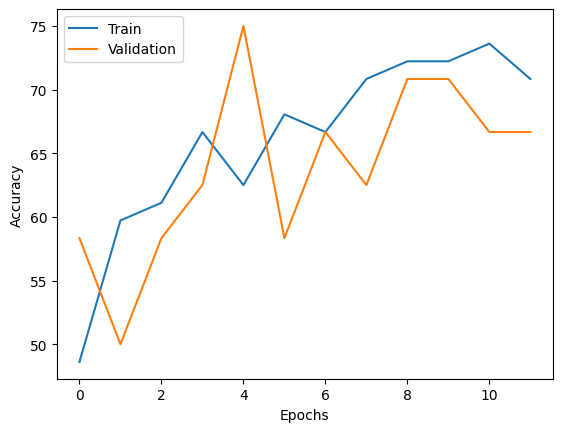

In [ ]:
# Plot training and validation accuracy over epochs
plt.plot([i for i in range(len(train_accuracy_list))], train_accuracy_list, label="Train")
plt.plot([i for i in range(len(validation_accuracy_list))], validation_accuracy_list, label="Validation")
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Calculate accuracy, recall, precision and F1 on the test set

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

all_preds = []
with t.no_grad():
    for X, Y in test_data_loader:
        out, _ = rnn_layer1(X)
        out = out[:, -1, :]
        out = relu(fc_layer1(out))
        out = fc_layer2(out)
        _, predicted = t.max(out.data, 1)
        all_preds.extend(predicted.cpu().numpy())

# Calculate metrics
accuracy = accuracy_score(targets_test, all_preds)
recall = recall_score(targets_test, all_preds, average='weighted')  # Use 'weighted' for multiclass
precision = precision_score(targets_test, all_preds, average='weighted') # Use 'weighted' for multiclass
f1 = f1_score(targets_test, all_preds, average='weighted') # Use 'weighted' for multiclass

print(f"Accuracy: {accuracy}")
print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

Accuracy: 0.6666666666666666
Recall: 0.6666666666666666
Precision: 0.7361111111111112
F1 Score: 0.65
